In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
from scipy import interpolate
# from datetime import timedelta
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings("ignore")  # Ignore warnings

In [3]:
# Step 1: Load the CSV file containing historical price data
data = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])

In [4]:
data['Dates']

0    2020-10-31
1    2020-11-30
2    2020-12-31
3    2021-01-31
4    2021-02-28
5    2021-03-31
6    2021-04-30
7    2021-05-31
8    2021-06-30
9    2021-07-31
10   2021-08-31
11   2021-09-30
12   2021-10-31
13   2021-11-30
14   2021-12-31
15   2022-01-31
16   2022-02-28
17   2022-03-31
18   2022-04-30
19   2022-05-31
20   2022-06-30
21   2022-07-31
22   2022-08-31
23   2022-09-30
24   2022-10-31
25   2022-11-30
26   2022-12-31
27   2023-01-31
28   2023-02-28
29   2023-03-31
30   2023-04-30
31   2023-05-31
32   2023-06-30
33   2023-07-31
34   2023-08-31
35   2023-09-30
36   2023-10-31
37   2023-11-30
38   2023-12-31
39   2024-01-31
40   2024-02-29
41   2024-03-31
42   2024-04-30
43   2024-05-31
44   2024-06-30
45   2024-07-31
46   2024-08-31
47   2024-09-30
Name: Dates, dtype: datetime64[ns]

In [5]:
# Step 2: Set 'Date' as the index for easier time-series handling

data.set_index('Dates', inplace=True)

In [6]:
data.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


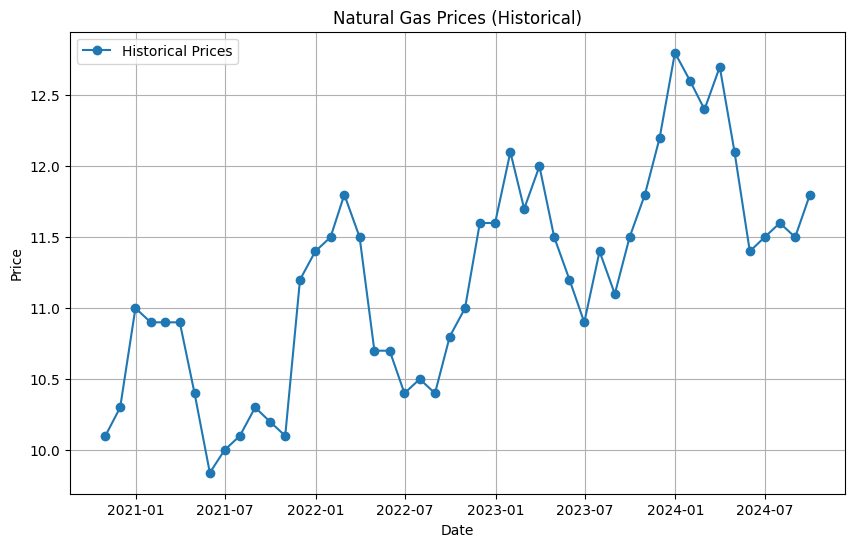

In [7]:
# Step 3: Visualize the data
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Prices'], label='Historical Prices', marker='o')
plt.title('Natural Gas Prices (Historical)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

<Axes: xlabel='Dates'>

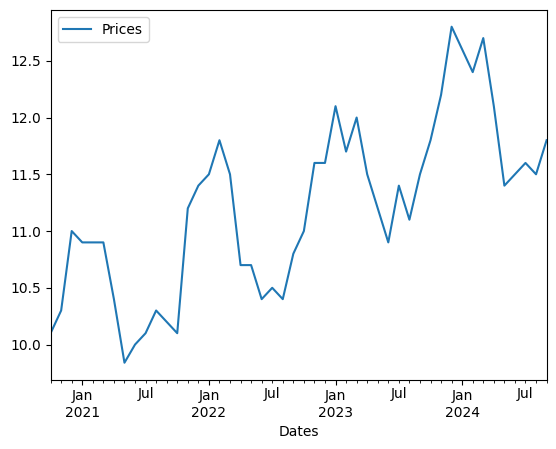

In [8]:
data.plot()

In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [10]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(prices):
    result=adfuller(prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(data['Prices'])

ADF Test Statistic : 0.21807686170000193
p-value : 0.9732574388448694
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
data['Prices First Difference'] = data['Prices'] - data['Prices'].shift(1)

In [13]:
data['Seasonal First Difference']=data['Prices']-data['Prices'].shift(12)

In [14]:
adfuller_test(data['Prices First Difference'].dropna())

ADF Test Statistic : -6.844773557477345
p-value : 1.754169685294091e-09
#Lags Used : 9
Number of Observations Used : 37
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.338337757875165
p-value : 2.7945314748502356e-08
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Dates'>

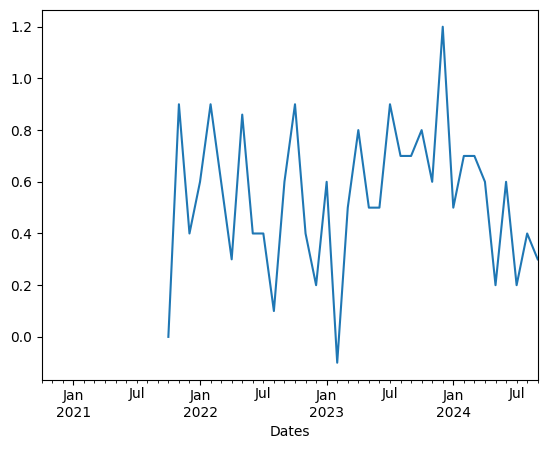

In [16]:
data['Seasonal First Difference'].plot()

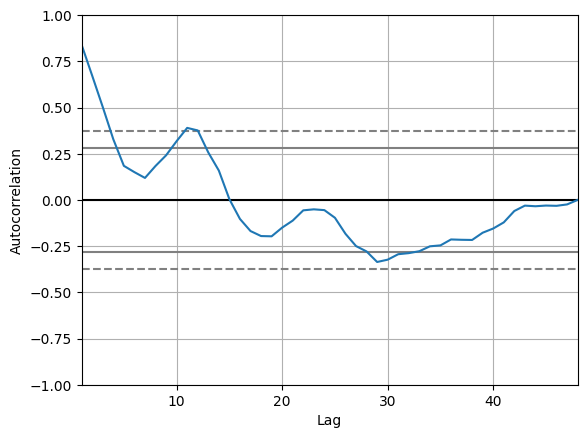

In [17]:
import pandas
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Prices'])
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

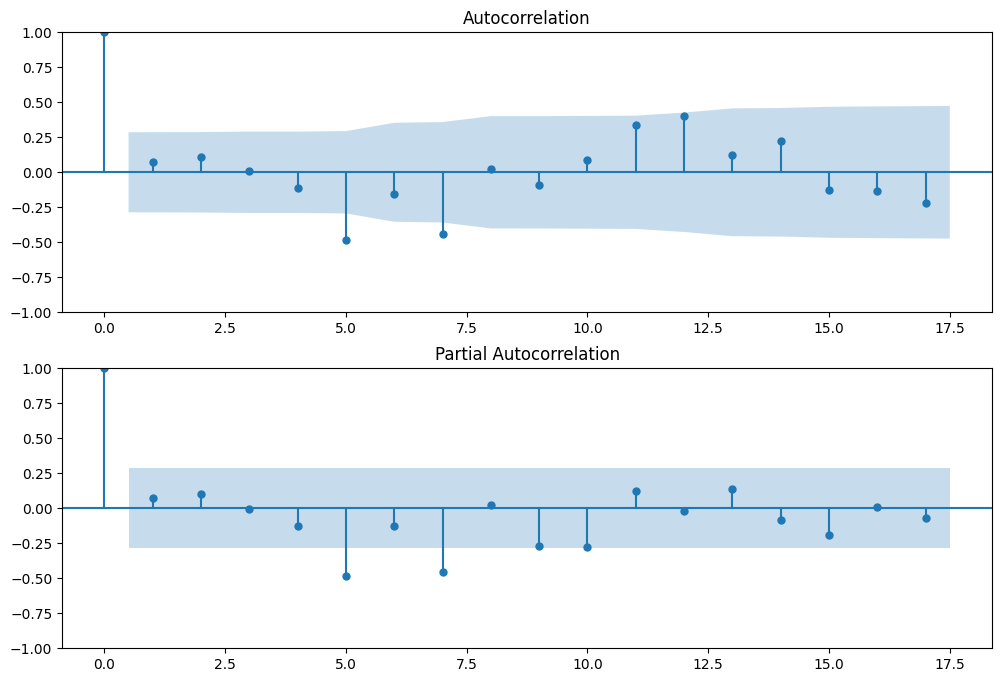

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Prices First Difference'].iloc[1:],ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Prices First Difference'].iloc[1:],ax=ax2)

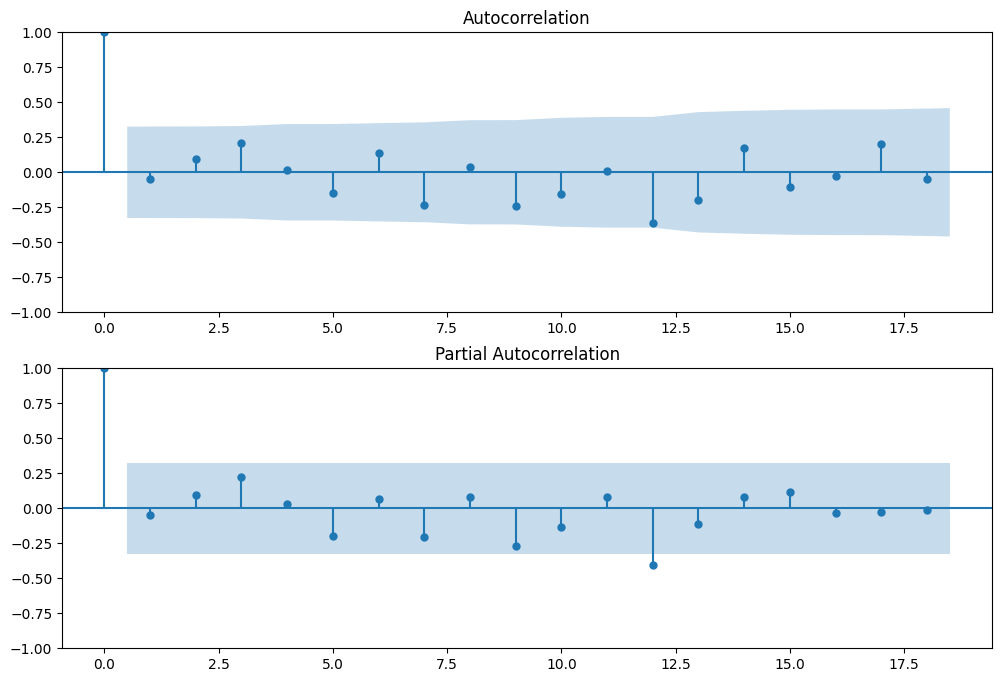

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Seasonal First Difference'].iloc[12:],lags=18,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Seasonal First Difference'].iloc[12:],lags=18,ax=ax2)

In [24]:
# p = 5
# d = 1
# q = 5
# P = 12
# D = 0
# Q = 0
# m = 12

In [1]:
# p = 12
# d = 1
# q = 0
# P = 0
# D = 1
# Q = 0
# m = 12
# model = SARIMAX(data['Prices'],order=(p,d,q),seasonal_order=(P,D,Q,m))
# results=model.fit()

In [21]:
len(data['Prices'])

48

In [22]:
data

,Prices,Prices First Difference,Seasonal First Difference
Dates,,,
2020-10-31,10.10,NaN,NaN
2020-11-30,10.30,0.20,NaN
2020-12-31,11.00,0.70,NaN
2021-01-31,10.90,-0.10,NaN
2021-02-28,10.90,0.00,NaN
2021-03-31,10.90,0.00,NaN
2021-04-30,10.40,-0.50,NaN
2021-05-31,9.84,-0.56,NaN
2021-06-30,10.00,0.16,NaN


In [39]:
p = 5
d = 1
q = 5
P = 12
D = 0
Q = 0
m = 12
model = SARIMAX(data['Prices'][:36],order=(p,d,q),seasonal_order=(P,D,Q,m))
results=model.fit()

In [88]:
# Step 4: Fit an SARIMA model to the data
# Define a function to calculate MAPE
def calculate_mape(true, pred):
    return mean_absolute_percentage_error(true, pred)

In [116]:
predictions_train = results.get_prediction(start=0, end=len(data)-13).predicted_mean
predictions_test = results.get_prediction(start=36, end=len(data)-1).predicted_mean
mape_train = calculate_mape(data['Prices'][0:len(data)-12], predictions_train)
mape_test = calculate_mape(data['Prices'][36:len(data)], predictions_test)
print(f"MAPE_Training: {round(mape_train*100,2)}%")
print(f"MAPE_Testing: {round(mape_test*100,2)}%")

MAPE_Training: 4.59%
MAPE_Testing: 1.09%


<Axes: xlabel='Dates'>

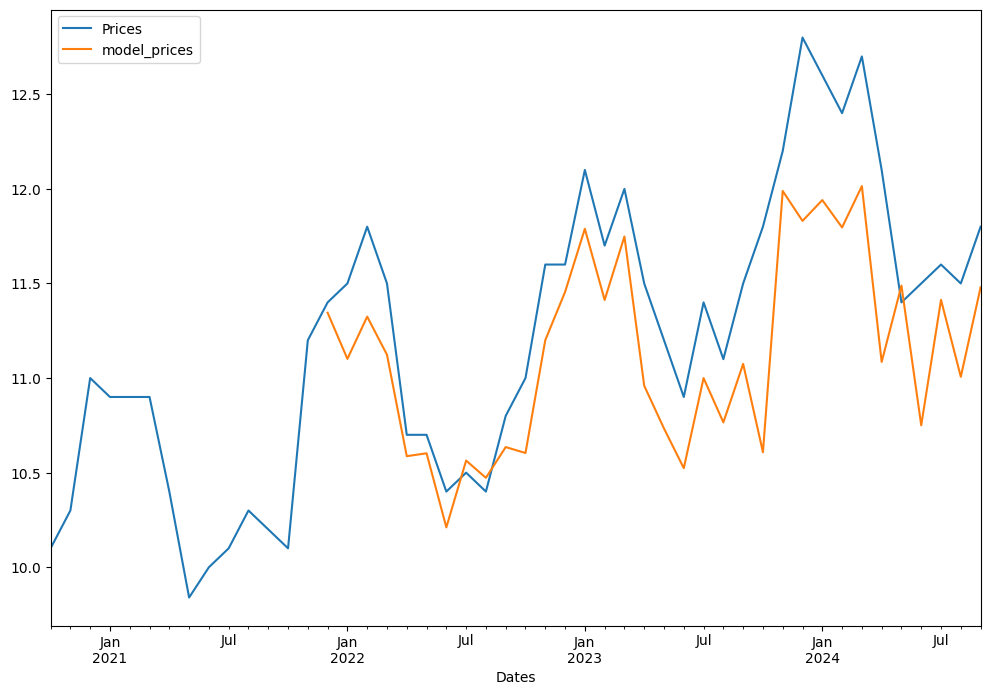

In [45]:
data['model_prices']=results.predict(start=14, end=len(data)-1,dynamic=True)
data[['Prices','model_prices']].plot(figsize=(12,8))

In [104]:
p = 5
d = 1
q = 5
P = 12
D = 0
Q = 0
m = 12
model = SARIMAX(data['Prices'],order=(p,d,q),seasonal_order=(P,D,Q,m))
results=model.fit()

In [117]:
predictions = results.get_prediction(start=0, end=len(data)-1).predicted_mean
mape = calculate_mape(data['Prices'], predictions)
print(f"MAPE: {round(mape*100,2)}%")

MAPE: 3.72%


In [107]:
# Step 5: Forecast prices for an additional 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

In [108]:
# Get the predicted mean for the forecast
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
forecast_values = forecast.predicted_mean

In [109]:
# Create a DataFrame for the forecast
forecast_data = pd.DataFrame({'Prices': forecast_values}, index=forecast_index)

In [110]:
forecast_data

,Prices
2024-10-31,11.689733
2024-11-30,12.613871
2024-12-31,12.845542
2025-01-31,13.028078
2025-02-28,13.065172
2025-03-31,12.979746
2025-04-30,12.152267
2025-05-31,12.097530
2025-06-30,11.855091
2025-07-31,11.967339


In [111]:
# Step 6: Concatenate the historical data with the forecasted data
extended_data = pd.concat([data, forecast_data])

In [112]:
# Step 7: Interpolation function for past dates
def interpolate_price(input_date, data):
    """
    Interpolates the price for a given date in the past based on historical monthly prices.
    """
    input_date = pd.to_datetime(input_date)
    if input_date < data.index.min() or input_date > data.index.max():
        return None  # Out of bounds for interpolation
    # Perform linear interpolation on the historical data
    interp_function = interpolate.interp1d(data.index.values.astype(np.int64), data['Prices'], fill_value="extrapolate")
    return interp_function(input_date.value)

In [113]:
# Step 8: Prediction function for future dates
def predict_price(input_date):
    """
    Predicts the price for a given future date based on the ARIMA model forecast.
    """
    input_date = pd.to_datetime(input_date)
    
    # If the date is within the ARIMA forecast range, return the forecasted value
    if input_date > forecast_data.index.min() or input_date < forecast_data.index.max():
        return interpolate_price(input_date, forecast_data)
    
    # If the input date is beyond the forecasted range, we need to extend the forecast
    additional_days = (input_date - forecast_data.index[-1]).days
    additional_months = additional_days // 30  # Convert days to months roughly
    
    # Extend the ARIMA model's forecast for the additional months
    extended_forecast = results.get_forecast(steps=forecast_steps + additional_months)
    extended_forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps + additional_months, freq='ME')
    extended_forecast_values = extended_forecast.predicted_mean
    
    extended_forecast_data = pd.DataFrame({'Prices': extended_forecast_values}, index=extended_forecast_index)
    
    if input_date in extended_forecast_data.index:
        return interpolate_price(input_date, extended_forecast_data)
    else:
        return None  # Date out of bounds for prediction


In [114]:
# Step 9: Unified function to estimate price on any date (past or future)
def estimate_price(input_date):
    """
    Estimates the price of natural gas for any given date.
    For past dates, it interpolates from historical data.
    For future dates, it predicts using ARIMA.
    """
    input_date = pd.to_datetime(input_date)
    
    # If the date is in the historical range, interpolate
    if input_date <= data.index.max():
        return interpolate_price(input_date, data)
    
    # If the date is in the future, predict using ARIMA
    elif input_date > data.index.max():
        return predict_price(input_date)
    
    else:
        return "Date out of range"

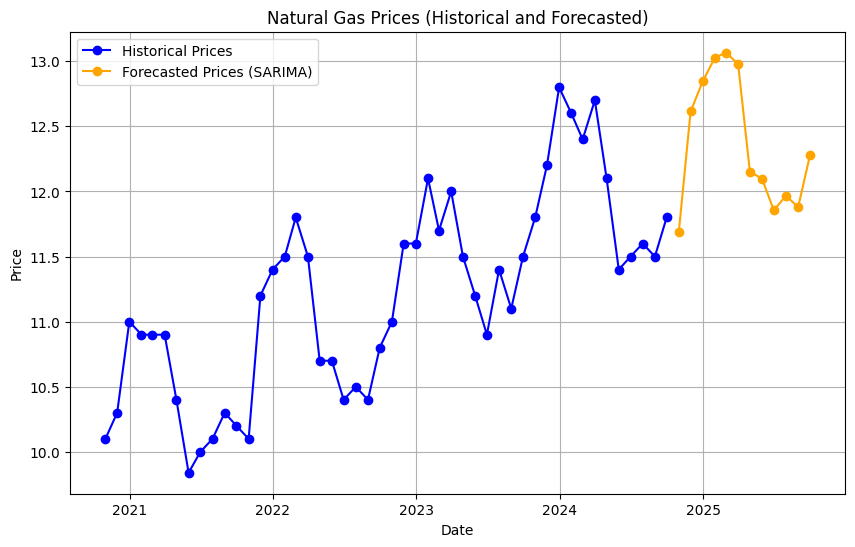

In [115]:
# Step 10: Visualize both historical and forecasted prices
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Prices'], label='Historical Prices', marker='o', color='blue')
plt.plot(forecast_data.index, forecast_data['Prices'], label='Forecasted Prices (SARIMA)', marker='o', color='orange')
plt.title('Natural Gas Prices (Historical and Forecasted)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [96]:
# Step 11: Example usage - Estimate the price on a specific date
input_date_past = '2022-07-15'  # A past date (interpolation)
input_date_future = '2025-04-20'  # A future date (prediction)

estimated_price_past = estimate_price(input_date_past)
estimated_price_future = estimate_price(input_date_future)

print(f"Estimated price on {input_date_past}: ${estimated_price_past:.2f}")
print(f"Estimated price on {input_date_future}: ${estimated_price_future:.2f}")

Estimated price on 2022-07-15: $10.45
Estimated price on 2025-04-20: $12.64


In [33]:
def calculate_storage_contract_value(
    injection_dates, withdrawal_dates, 
    injection_rate, withdrawal_rate, 
    max_storage, storage_cost_per_unit, storage_duration_days
):
    """
    Calculate the value of a natural gas storage contract.

    Parameters:
    - injection_dates (list): Dates when gas is injected (assumed sorted).
    - withdrawal_dates (list): Dates when gas is withdrawn (assumed sorted).
    - prices (dict): Dictionary of dates and corresponding natural gas prices.
    - injection_rate (float): Rate of gas injection (units per day).
    - withdrawal_rate (float): Rate of gas withdrawal (units per day).
    - max_storage (float): Maximum storage capacity (in units).
    - storage_cost_per_unit (float): Cost of storing gas per unit per day.
    - storage_duration_days (int): Number of days gas is stored.

    Returns:
    - contract_value (float): Net value of the storage contract.
    """
    
    # Step 1: Calculate the total gas injected over the injection dates
    total_injected_volume = 0
    total_purchase_cost = 0
    for date in injection_dates:
        price_at_injection = estimate_price(date)
        daily_injection = min(injection_rate, max_storage - total_injected_volume)  # Can't inject beyond capacity
        total_injected_volume += daily_injection
        total_purchase_cost += daily_injection * price_at_injection
    
    # Step 2: Calculate the total gas withdrawn over the withdrawal dates
    total_withdrawn_volume = 0
    total_revenue = 0
    for date in withdrawal_dates:
        price_at_withdrawal = estimate_price(date)
        daily_withdrawal = min(withdrawal_rate, total_injected_volume - total_withdrawn_volume)  # Can't withdraw more than stored
        total_withdrawn_volume += daily_withdrawal
        total_revenue += daily_withdrawal * price_at_withdrawal
    
    # Step 3: Calculate the storage cost
    storage_cost = total_injected_volume * storage_cost_per_unit * storage_duration_days
    
    # Step 4: Calculate the net value of the contract
    print("Total Revenue: ", total_revenue)
    print("Total Purchase Cost: ", total_purchase_cost)
    print("Total Storage Cost: ", storage_cost)
    
    contract_value = total_revenue - total_purchase_cost - storage_cost
    
    return contract_value

In [38]:
injection_dates = ['2023-01-01', '2023-02-01']
withdrawal_dates = ['2023-05-01', '2023-06-01']

injection_rate = 500  # units per day
withdrawal_rate = 600  # units per day
max_storage = 3000  # maximum units that can be stored
storage_cost_per_unit = 0.01  # storage cost per unit per day
storage_duration_days = 10  # Number of days gas will be stored

In [39]:
# Calculate the contract value
contract_value = calculate_storage_contract_value(
    injection_dates, withdrawal_dates,
    injection_rate, withdrawal_rate, 
    max_storage, storage_cost_per_unit, storage_duration_days
)

print(f"The value of the storage contract is: ${contract_value:.2f}")

Total Revenue:  11370.193548387097
Total Purchase Cost:  11850.921658986175
Total Storage Cost:  100.0
The value of the storage contract is: $-580.73
